# Linear Regression

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead.
But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow_bold.PNG" width= "300">

Now, let's take our discussion of Linear Regression further

## What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.


Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.


## The use of Regression

Regression analyses the relationship between two or more features. Let’s take an example:

Let’s suppose we want to make an application which predicts the chances of admission a student to a foreign university. In that case, the 

The benefits of using Regression analysis are as follows:

   * It shows the significant relationships between the Lable (dependent variable) and the features(independent variable).
   * It shows the extent of the impact of multiple independent variables on the dependent variable.
   *  It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.


## Linear Regression

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
* Discreet/continuous independent variables
* A best-fit regression line
* Continuous dependent variable.
i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables.
The equation of the Linear Regression is:

                                                Y=a+b*X + e 

 Where,
 a is the intercept, 
b is the slope of the line, 
and e is the error term. 
The equation above is used to predict the value of the target variable based on the given predictor variable(s).


In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [3]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [7]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

C:\Users\bmounika\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bmounika\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bmounika\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

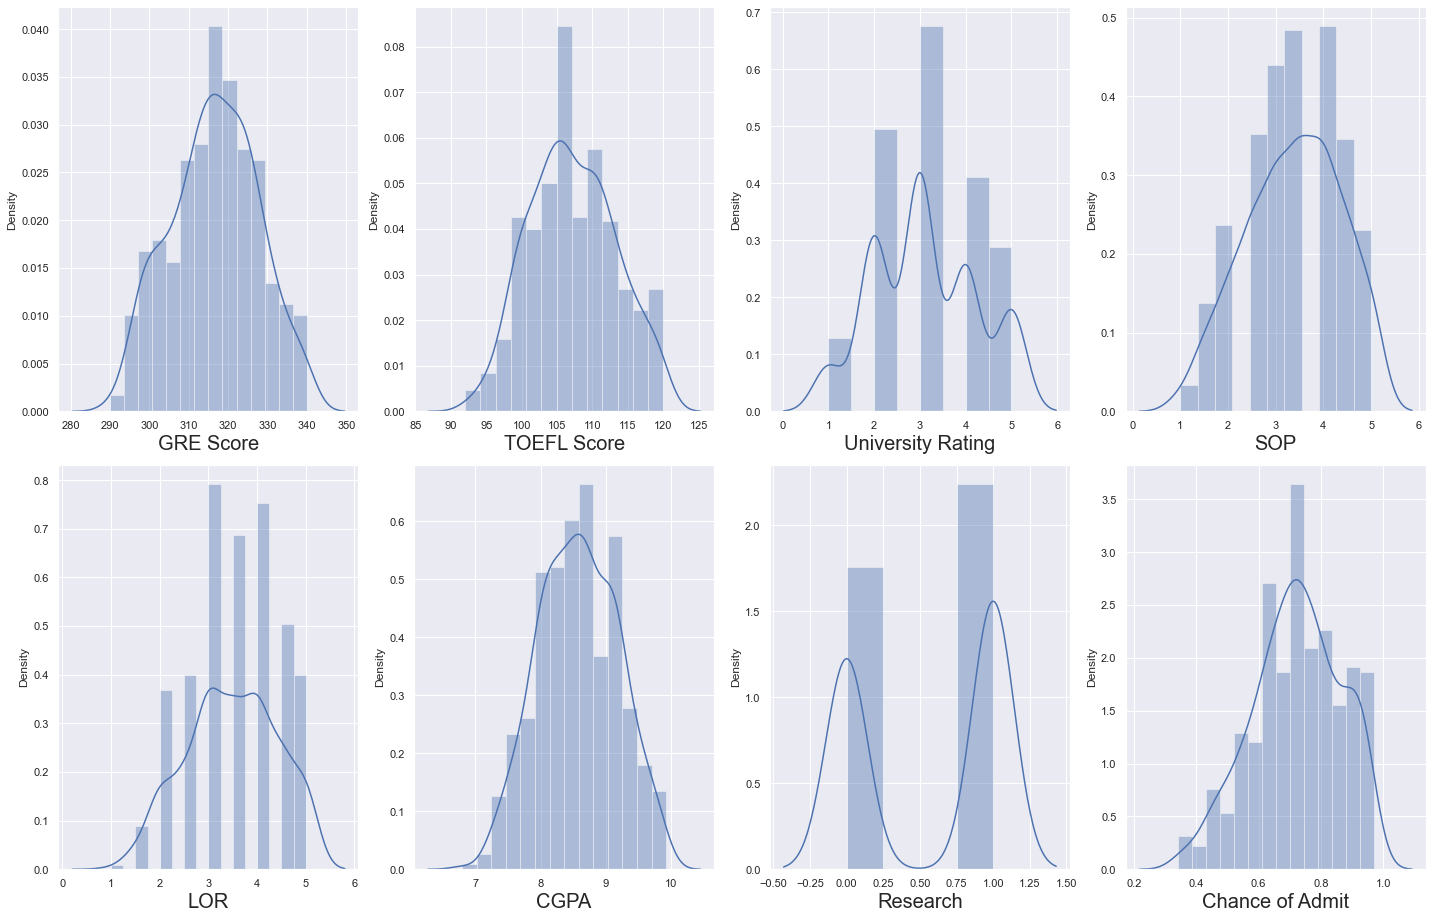

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [9]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

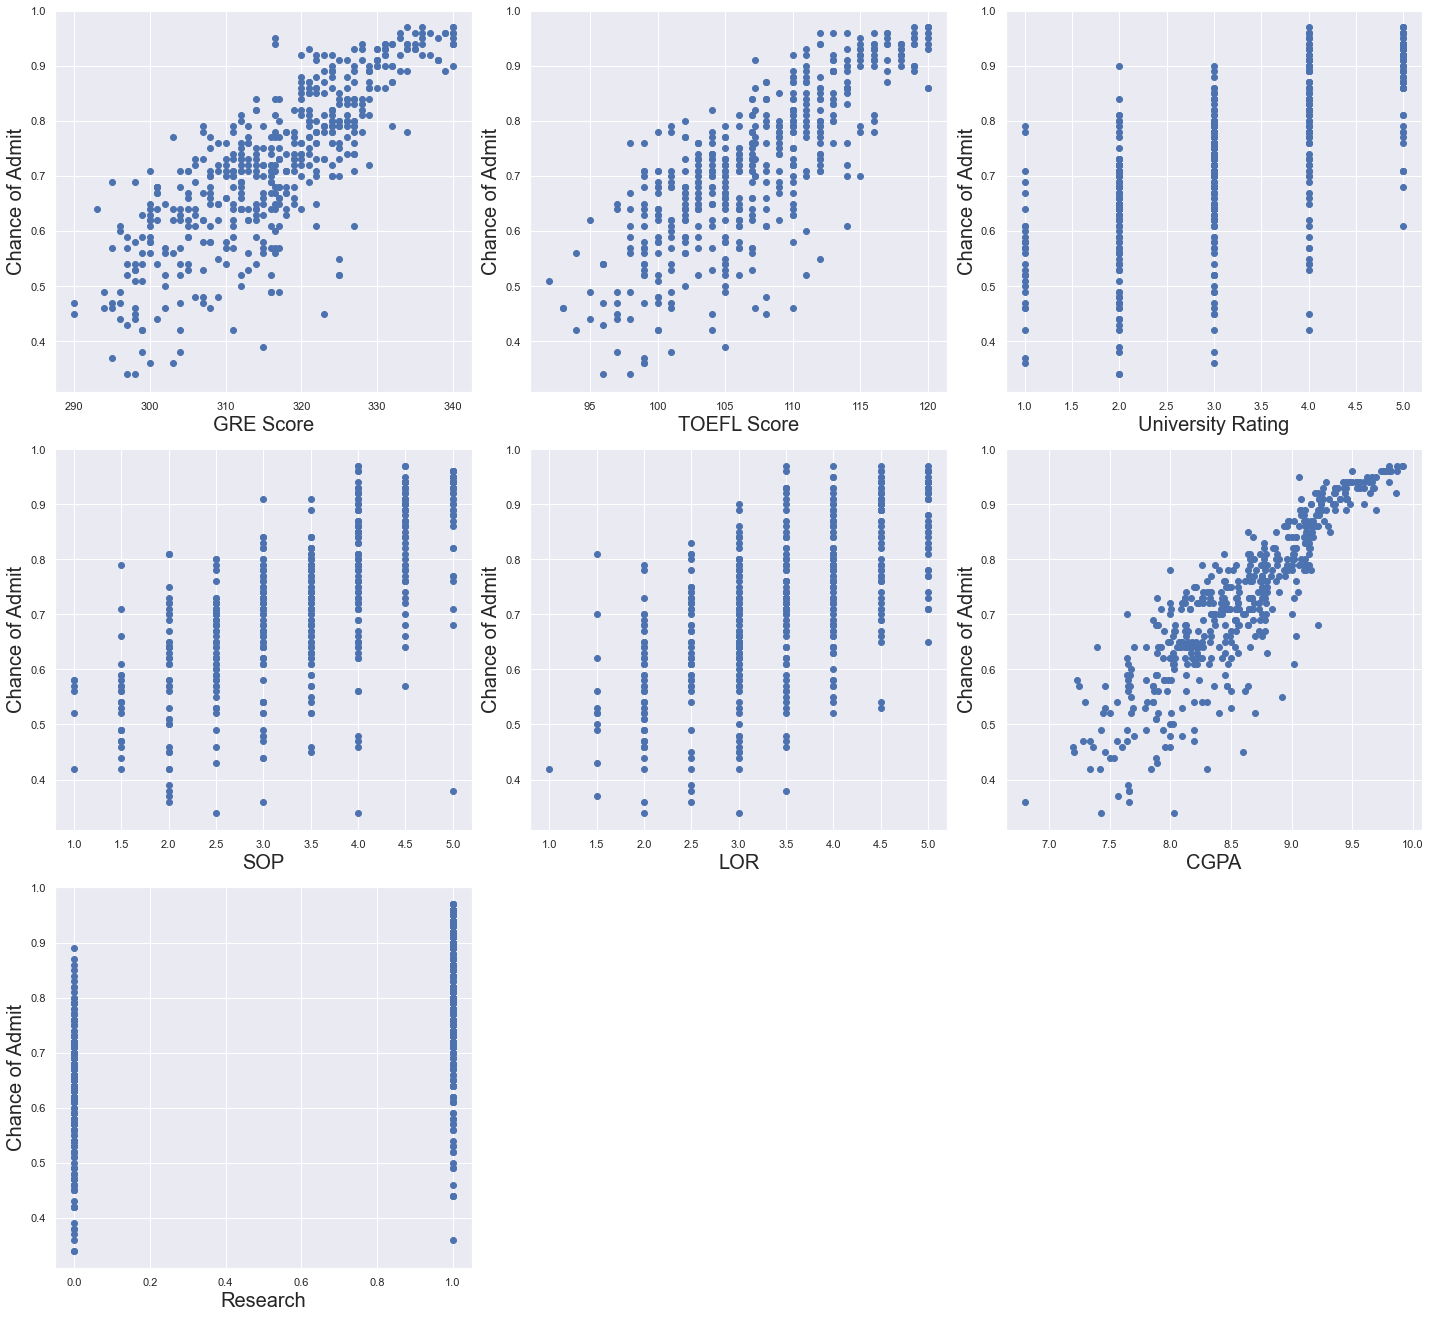

In [10]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [11]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [13]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go. 

Great. Let's go ahead and use linear regression and see how good it fits our data.
But first. let's split our data in train and test.

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [15]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [16]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [19]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [20]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [21]:
regression.score(x_train,y_train)

0.8415250484247909

In [22]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training et., so looks like we are not being penalized by use of any feature.

Let's check how well model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [23]:
regression.score(x_test,y_test)

0.7534898831471066

In [24]:
adj_r2(x_test,y_test)

0.7387414146174464

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [25]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [26]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [27]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [28]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [29]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([9.21350487, 0.97270147, 4.12521662, 1.70311822, 7.48638118,
       3.88155588, 9.82860964, 1.65603361, 0.80303691, 5.84981047,
       6.7707701 , 2.66161957, 9.39361857, 9.01433683, 6.08480351,
       2.62515539, 1.86516433, 8.78877276, 3.40936686, 9.89821539,
       6.25869858, 1.68645501, 5.08833827, 2.27444148, 4.48074908,
       0.5919332 , 1.25345824, 3.2155272 , 1.75224084, 0.52282646,
       8.30704895, 1.74929202, 2.74797229, 2.43359013, 7.2147379 ,
       1.20610984, 0.26795292, 9.72059517, 7.95405292, 2.26762821,
       2.53694239, 6.63984594, 7.191289  , 3.98568628, 8.56990287,
       5.11259964, 9.55338393, 1.32218827, 4.15508543, 4.24343815]),
        cv=10, normalize=True)

In [30]:
ridgecv.alpha_

0.26795291801388954

In [31]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.26795291801388954)

In [32]:
ridge_model.score(x_test, y_test)

0.7536204816025838

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [33]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [34]:
elasticCV.alpha_

0.0011069728449315508

In [35]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [36]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [37]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867